In [1]:
from textblob import TextBlob #python -m pip install textblob
import csv
import sys
csv.field_size_limit(sys.maxsize)

131072

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/bryange/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
id_list = []
content_list = []
subjectivity_list = []
polarity_list = []

In [4]:
with open('./extract_data.csv','r') as csvreader:
        reader = csv.DictReader(csvreader)
        extract_data = list(reader)
        for i in range(100):
            id_list.append(extract_data[i]['id'])
            content_list.append(extract_data[i]['content'])
print(id_list[0])
print(content_list[0])

151908
The son of a Louisiana man whose father was shot and killed at   range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the    son of Alton Sterling, whose death at the hands of police was caught on video, spoke about his father and protests.  Alton Sterling was killed by Baton Rouge police on 5 July at a convenience store, where he was said to be selling CDs. Baton Rouge police said in a statement that police were called to the convenience store because Sterling had allegedly threatened another patron with a gun.  The press conference on Wednesday is Cameron’s first since he broke into sobs at a nationally broadcast press conference with his mother, following his father’s death. “I came to talk to everyone about one: the death of my father. And, two: about how I feel about people in general,” said Cameron, whose distinctly young voice was calm and composed in front of the scrum of reporters at the Triple S convenience stor

In [5]:
analysis = TextBlob(content_list[0])

In [6]:
# analysis.words
analysis.sentences

[Sentence("The son of a Louisiana man whose father was shot and killed at   range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”."),
 Sentence("Cameron Sterling, the    son of Alton Sterling, whose death at the hands of police was caught on video, spoke about his father and protests."),
 Sentence("Alton Sterling was killed by Baton Rouge police on 5 July at a convenience store, where he was said to be selling CDs."),
 Sentence("Baton Rouge police said in a statement that police were called to the convenience store because Sterling had allegedly threatened another patron with a gun."),
 Sentence("The press conference on Wednesday is Cameron’s first since he broke into sobs at a nationally broadcast press conference with his mother, following his father’s death."),
 Sentence("“I came to talk to everyone about one: the death of my father."),
 Sentence("And, two: about how I feel about people in general,” said Cameron, whose distinctly young voice was

In [7]:
print(analysis.words[1])
print(analysis.words[1].pluralize())
print(analysis.words[19])
print(analysis.words[19].singularize())

son
sons
protesters
protester


In [8]:
analysis.sentiment

Sentiment(polarity=-0.05616883116883116, subjectivity=0.40156641604010024)

In [9]:
for content in content_list:
    analysis = TextBlob(content)
    subjectivity_list.append(analysis.sentiment.subjectivity)
    polarity_list.append(analysis.sentiment.polarity)

In [10]:
import statistics
print(max(subjectivity_list))
print(min(subjectivity_list))
print(statistics.mean(subjectivity_list))

0.6022703616965912
0.22988215488215488
0.43265374629799064


In [11]:
print(max(polarity_list)) #[-1,1]
print(min(polarity_list))
print(statistics.mean(polarity_list))

0.3
-0.05616883116883116
0.08920580572099676


(array([ 1.,  0.,  0.,  1.,  2.,  5.,  2.,  6., 11., 11., 14., 11.,  8.,
        10., 11.,  2.,  1.,  2.,  1.,  1.]),
 array([0.22988215, 0.24850157, 0.26712098, 0.28574039, 0.3043598 ,
        0.32297921, 0.34159862, 0.36021803, 0.37883744, 0.39745685,
        0.41607626, 0.43469567, 0.45331508, 0.47193449, 0.4905539 ,
        0.50917331, 0.52779272, 0.54641213, 0.56503154, 0.58365095,
        0.60227036]),
 <a list of 20 Patch objects>)

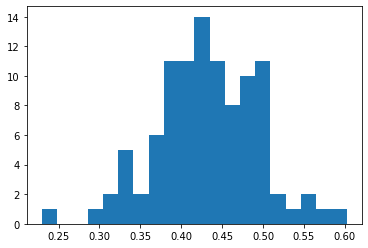

In [12]:
import matplotlib.pyplot as plt
plt.hist(subjectivity_list, bins = 20)

(array([ 2.,  0.,  1.,  7.,  7., 11., 11., 12., 10., 11., 12.,  5.,  3.,
         4.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([-0.05616883, -0.03836039, -0.02055195, -0.00274351,  0.01506494,
         0.03287338,  0.05068182,  0.06849026,  0.0862987 ,  0.10410714,
         0.12191558,  0.13972403,  0.15753247,  0.17534091,  0.19314935,
         0.21095779,  0.22876623,  0.24657468,  0.26438312,  0.28219156,
         0.3       ]),
 <a list of 20 Patch objects>)

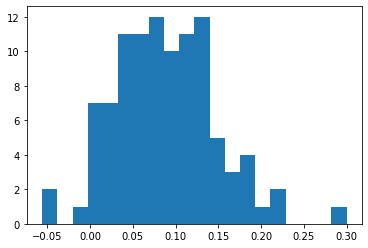

In [13]:
plt.hist(polarity_list, bins = 20)

(array([ 1.,  0.,  0.,  1.,  2.,  5.,  2.,  6., 11., 11., 14., 11.,  8.,
        10., 11.,  2.,  1.,  2.,  1.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

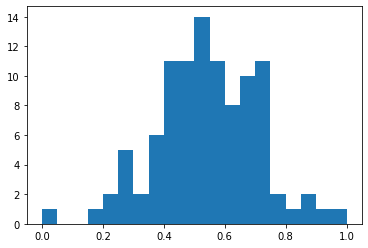

In [15]:
#normalize
#https://www.statisticshowto.com/probability-and-statistics/normal-distributions/normalized-data-normalization/#:~:text=Normalization%20usually%20means%20to%20scale,A%20z%2Dscore%20standardizes%20variables.

normalized_subjectivity_list = []
subjectivity_list_min = min(subjectivity_list)
subjectivity_list_max = max(subjectivity_list)
subjectivity_range = subjectivity_list_max - subjectivity_list_min
for subjectivity in subjectivity_list:
    normalized_subjectivity = (subjectivity - subjectivity_list_min) / subjectivity_range
    normalized_subjectivity_list.append(normalized_subjectivity)

plt.hist(normalized_subjectivity_list, bins = 20)

(array([ 2.,  0.,  1.,  7.,  7., 11., 11., 12., 10., 11., 12.,  5.,  3.,
         4.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

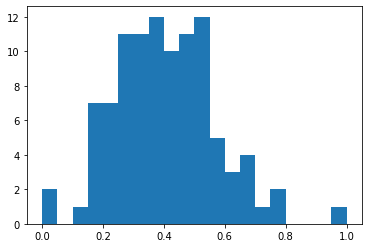

In [19]:
normalized_polarity_list = []
polarity_list_min = min(polarity_list)
polarity_list_max = max(polarity_list)
polarity_range = polarity_list_max - polarity_list_min
for polarity in polarity_list:
    normalized_polarity = (polarity - polarity_list_min) / polarity_range
    normalized_polarity_list.append(normalized_polarity)

plt.hist(normalized_polarity_list, bins = 20)